# Exponents, Radicals & Logarithms

In [1]:
import math
from math import floor, ceil, log
import numpy as np

### Solving exponential equation
> Example:<br>
[$$1111 = 5.2^x$$](https://www.youtube.com/watch?v=7Ig6kVZaWoU)



In [2]:
# Using math.log
a = 1111
b = 5.20

# Find the x from above equation
x = log(1111, 5.2)

# using truncate() 
def truncate(n, digit=0):
    multiplier = 10**digit
    res = math.ceil(n * multiplier)/ multiplier
    return res

# Round of up to thousandths
result = truncate(x, 3)
print('x == {} from the example problem.'.format(result))

#checking use floor to round down to whole number
check = floor(b** result)
print('5.2^x is {}.'.format(check))
print(a == check)

x == 4.254 from the example problem.
5.2^x is 1111.
True


> if : $y = 5.2^x$ solve for y

In [3]:
import pandas as pd

# Create a dataframe with an x column containing values from -10 to 10
df = pd.DataFrame ({'x': range(-10, 11)})
pd.set_option('display.float_format', '{:.1f}'.format)
# Add a y column by applying the slope-intercept equation to x
df['y'] = b**df['x']

#Display the dataframe
print(df)


     x          y
0  -10        0.0
1   -9        0.0
2   -8        0.0
3   -7        0.0
4   -6        0.0
5   -5        0.0
6   -4        0.0
7   -3        0.0
8   -2        0.0
9   -1        0.2
10   0        1.0
11   1        5.2
12   2       27.0
13   3      140.6
14   4      731.2
15   5     3802.0
16   6    19770.6
17   7   102807.2
18   8   534597.3
19   9  2779905.9
20  10 14455510.6


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.x

0    -10
1     -9
2     -8
3     -7
4     -6
5     -5
6     -4
7     -3
8     -2
9     -1
10     0
11     1
12     2
13     3
14     4
15     5
16     6
17     7
18     8
19     9
20    10
Name: x, dtype: int64

In [6]:
df.y

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.2
10          1.0
11          5.2
12         27.0
13        140.6
14        731.2
15       3802.0
16      19770.6
17     102807.2
18     534597.3
19    2779905.9
20   14455510.6
Name: y, dtype: float64

In [7]:
df.loc[df['y'] == 0], df['x']


(Empty DataFrame
 Columns: [x, y]
 Index: [], 0    -10
 1     -9
 2     -8
 3     -7
 4     -6
 5     -5
 6     -4
 7     -3
 8     -2
 9     -1
 10     0
 11     1
 12     2
 13     3
 14     4
 15     5
 16     6
 17     7
 18     8
 19     9
 20    10
 Name: x, dtype: int64)

In [8]:
#slope and y-intercept
slope, intercept = np.polyfit(df.x, df.y, 1)


In [9]:
slope

226898.3463522912

In [10]:
# x and y intercept 
# x == 0 and y == 1 or (0, 1) for y-intercept
for x, y in zip(df['x'], df['y']):
    if y == 0 or x == 0:
        print(x,y)
        

0 1.0


In [11]:
#Compute y-intercept 
#@ index 10, x == 0; y == 1
df.loc[df['x'] == 0, 'y']

10   1.0
Name: y, dtype: float64

In [12]:
#Compute x-intercept 
# @ (-2, 0) but many zero values in y with this problem
#@ index 10, x == 0; y == 1
df.loc[df['y'] == 0], df['x']

(Empty DataFrame
 Columns: [x, y]
 Index: [], 0    -10
 1     -9
 2     -8
 3     -7
 4     -6
 5     -5
 6     -4
 7     -3
 8     -2
 9     -1
 10     0
 11     1
 12     2
 13     3
 14     4
 15     5
 16     6
 17     7
 18     8
 19     9
 20    10
 Name: x, dtype: int64)

In [13]:
xs = np.array(df.x, dtype= np.float64)
ys = np.array(df.y, dtype=np.float64)

In [14]:
xs

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [15]:
ys

array([6.91777709e-08, 3.59724409e-07, 1.87056692e-06, 9.72694801e-06,
       5.05801296e-05, 2.63016674e-04, 1.36768671e-03, 7.11197087e-03,
       3.69822485e-02, 1.92307692e-01, 1.00000000e+00, 5.20000000e+00,
       2.70400000e+01, 1.40608000e+02, 7.31161600e+02, 3.80204032e+03,
       1.97706097e+04, 1.02807170e+05, 5.34597285e+05, 2.77990588e+06,
       1.44555106e+07])

In [16]:
slope, intercept = np.polyfit(xs, ys, 1)

In [17]:
slope

226898.3463522912

> Best-fit of slope <br>

[\begin{equation*}
m = \frac{\overline{x} * \overline{y} - \overline{xy}}{\overline{(x)}^2 - \overline{x^2} }
\end{equation*}](https://pythonprogramming.net/how-to-program-best-fit-line-slope-machine-learning-tutorial/)



In [18]:
intercept

852252.3253232383

In [19]:
from statistics import mean

In [20]:
# The slope computation using np and user defined best fit slope have same result.
def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs*xs)))
    return m

m = best_fit_slope(xs,ys)
print ('The slope is {}.'.format(m))

The slope is 226898.34635229118.


In [21]:
from scipy import stats


In [22]:
slop1, intercept1, r_value, p_value, std_err = stats.linregress(xs, ys)

In [23]:
slop1

226898.34635229112

In [24]:
intercept1

852252.3253232383

In [25]:
p_value

0.044145300975017135



### P-value

- A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

- A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

- p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.


| Truth        |          Accept Ho                    |           Reject Ho                  |
|:------------:|:-------------------------------------:|:------------------------------------:|
| Ho is true   | Correct Decision P: 1-alpha           | Type 1 error P(false positive): alpha|
| Ho is false  | Type 2 error P (false negative): beta | Correct Decision P: 1-beta           |

In [26]:
std_err

105258.72700985038

In [27]:
print('r-squared: ', r_value**2)

r-squared:  0.196505875077304


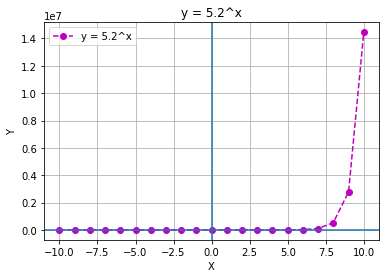

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(xs, ys, '--m', marker="o", label='y = 5.2^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('y = 5.2^x')
plt.legend(loc='upper left')
plt.axhline()
plt.axvline()
plt.grid()
plt.show()

#### Logarithmic Equation



In [57]:
from sympy import *
init_printing()

In [58]:
x, y = symbols('x y')
aa = Eq(x**2 - 2*x + 1)
aa

In [59]:
solve(aa)

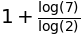

In [60]:
vv = log(14, 2)
vv


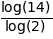

In [61]:
simplify(vv)

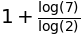

In [62]:
expand(vv)

In [63]:
s = log(x**2 - x - 30)
t = x**2 - x - 30
s

In [64]:
solve(s)

In [65]:
s1 = solve(s)
simplify(s1)

In [66]:
t


In [67]:
solve(t)

In [68]:
q = x**2 - 4*x + 4
q

In [69]:
solve(q)